# ANALISIS EXPLORATORIO DE DATOS 

In [1]:
a = 1

In [2]:
# importamos las librerias que usaremos 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv('E-Commerce_train.csv',delimiter=';')
data.set_index('ID',inplace= True)
data.head(2)

Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
ID                                                                          
1                D           Flight                    4                2   
2                F           Flight                    4                5   

    Cost_of_the_Product  Prior_purchases Product_importance Gender  \
ID                                                                   
1                   177                3                low      F   
2                   216                2                low      M   

    Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
ID                                                        
1                 44           1233                    1  
2                 59           3088                    1

In [16]:
## Descripción de las dimensiones

# - Warehouse_block: Almacén de distribución de donde salió la orden (A a F).           *
# - Mode_of_Shipment: Medio de transporte (Flight, Road, Ship).                         *
# - Customer_care_calls: Número de llamadas a atención al cliente que hubo por esa orden. (valores enteros del 2 al 7)
# - Customer_rating: Puntaje del cliente (valores enteros 1 al 5).
# - Cost_of_the_Product: Costo del producto (valor numérico entero de 96 a 310).
# - Prior_purchases: Número de compras previas realizadas por el cliente (valor numérico entero de 2 a 10).
# - Product_importance: Nivel de importancia del producto (low, medium, high).          *
# - Gender: Género del comprador (F, M).                                                *
# - Discount_offered: Porcentaje de descuento ofrecido por esa compra (valor numérico entero de 1 a 65):
# - Weight_in_gms: Peso del paquete de la orden, en gramos (valor numérico entero de 1001 a 7846).
# - Reached.on.Time_Y.N: Información sobre la llegada del paquete a destino (1 si llegó a tiempo, 0 si no llegó a tiempo).

Usaremos Pairplot para visualizar las relaciones entre los datos, recordando que tenemos variables que cuentan con una preponderancia de clasificacion siendo estas las de medio de transforme, genero, entre otras , las cuales no se podran mostrar en el grafico pairplot. Para estas variables se realizara una visualizacion diferente mas adelante

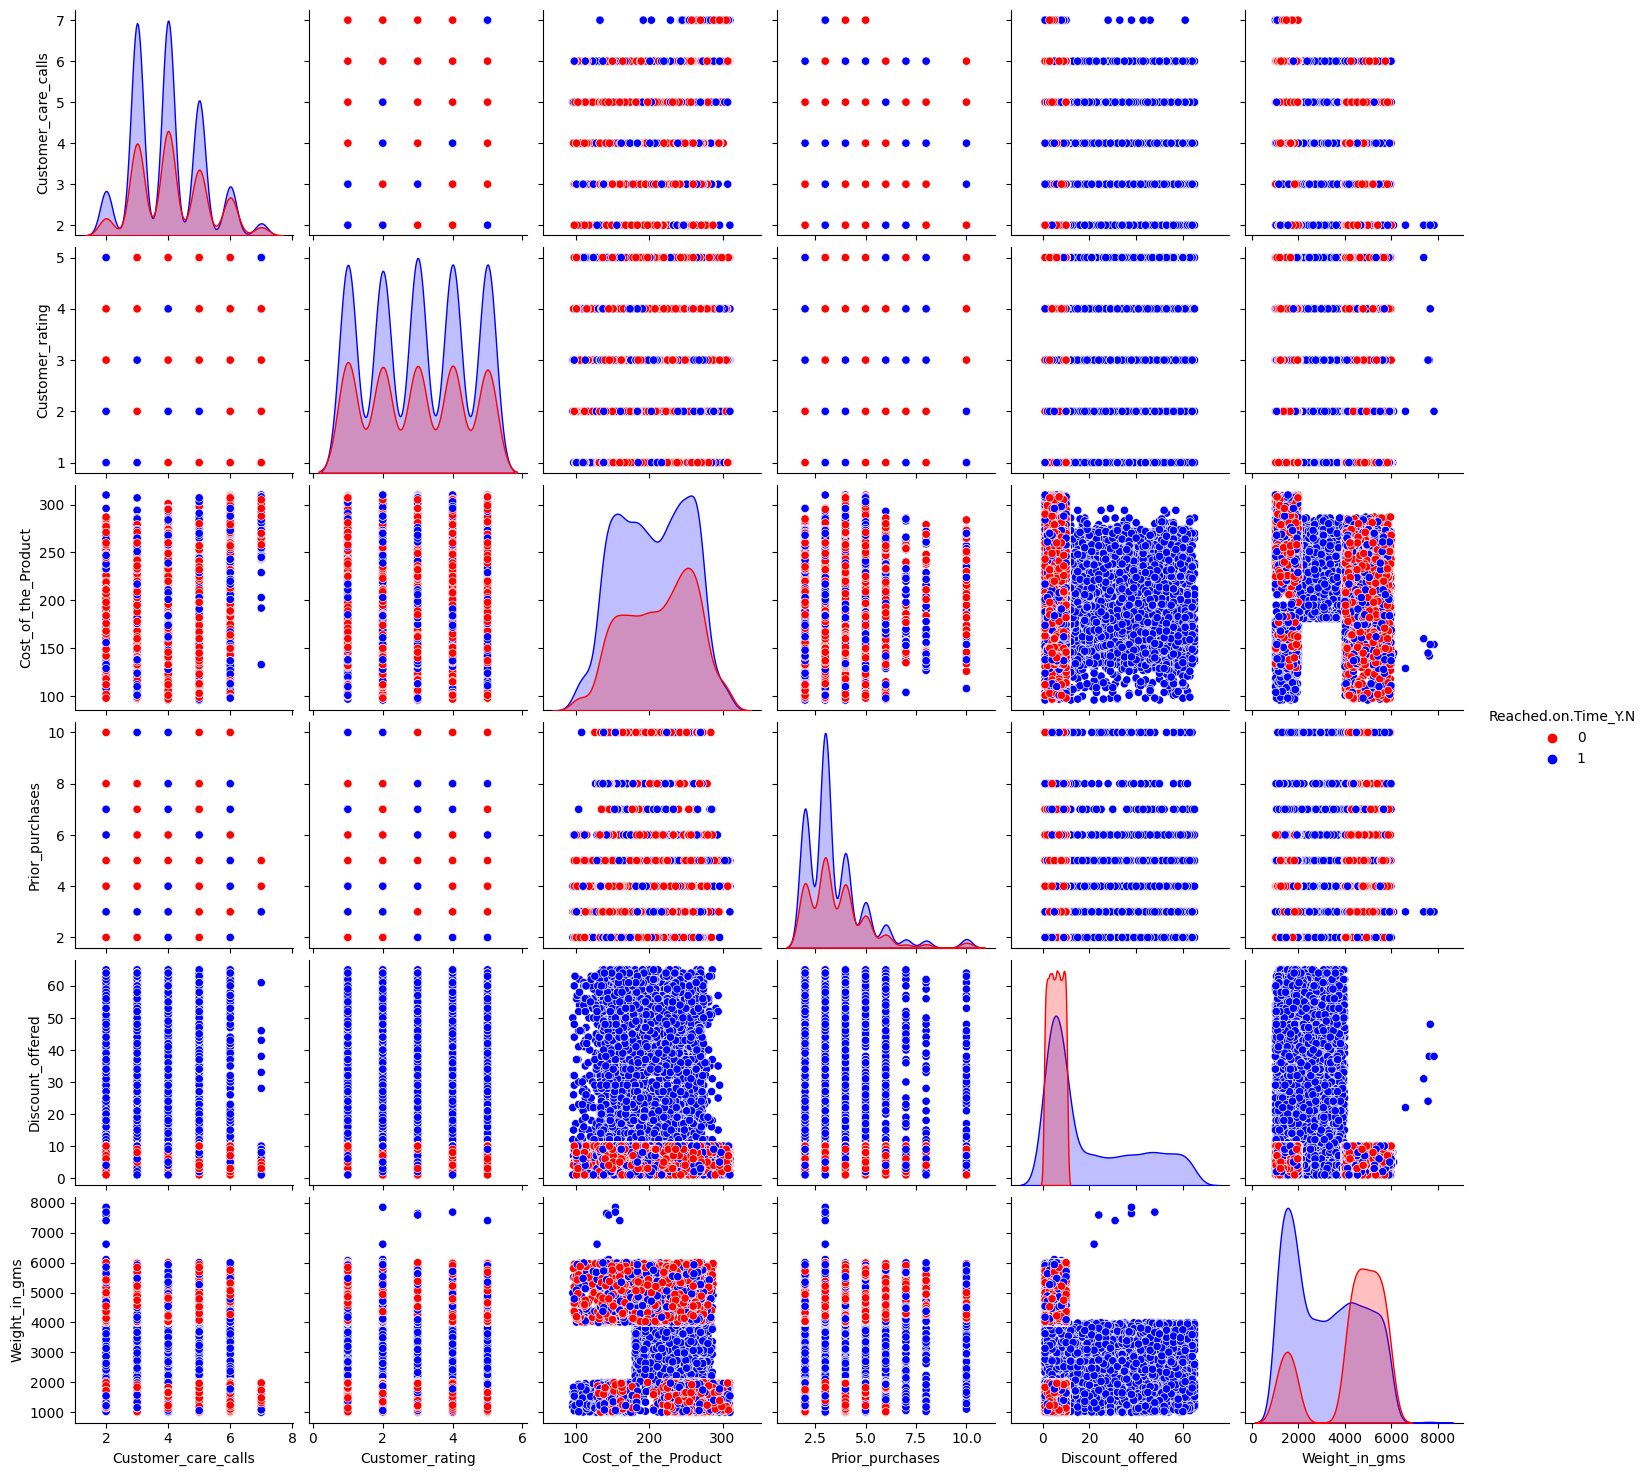

In [4]:
sns.pairplot(data, hue="Reached.on.Time_Y.N", palette = ['r', 'b'])
plt.show()

Analisis de las graficas mostradas (por variable):

    - Customer_care_calls: Distribuciones con picos definidos debido a la naturaleza de la variable, ademas de que existe una superposicion entre los datos pertenecientes a los paquetes entregados con exito y sin exito. Aún así se visualiza una diferencia en cuanto a la amplitud de los picos de las distribuciones, lo cual podria ser de ayuda para si diferenciacion. Otro punto a destacar es que la grafica de esta con la variable Discount_offered, muestra un patron que podria ser util para su uso, ya que a pesar de la superposicion de datos, se puede identificar una diferenciacion entre los grupos entregados y no entregados. 
    
    - Customer_rating: Caso analogo a la variable anterior, mostrando uniformidad entre las amplitudesde los picos de las distribuciones. Al combinarse con la variable Discount_offered se muestra un patron de agrupamiento para los paquetes entregados y no entregados

    - Cost_of_the_Product: Las distribuciones en esta variable son totalmente superpuestas, ademas que que no presentan simetrias en ningun aspecto. De forma independiente no se muestra como una variable relevante para la identificacion de la varible objetivo, sin embargo, podemos visualizar que al combinarse con la variable Discount_offered, la agrupacion de puntos es un tanto distingible, y podria usarse ambas para un posible modelo predictivo. Otra variabla con la que genera grupos un tanto diferenciados es Weigth_gms (a tomar en cuenta) 

    - Prior_purchases: Las distribuciones de esta variable, ademas de estar superpuestas, sus amplitudes no se muestran homogenes y hay poca diferenciacion entre las de una grafica de distrubicion y otra, por lo que se podria decir que no es una variable que aporte informacion relevante para este caso.

    - Discount_offered: Las graficas de distribucion de esta variable son un tanto extrañas... Ya que ademas de ser asimetricas, para los paquetes no entregados se muestra una acumulacion es un rango de valores, esto puede ser en parte beneficioso, ya que como visualizamos anteriormente, este comportamiento hace que su interaccion con otras variables pueda agrupar a los datos de la variable objetivo para su identificacion. Junto con la variable Weight_in_gms, se generan grupos relativamente definidos para la identificacion de nuestra variable objetivo, por lo tanto es otra relacion entre variables a cosiderar .

    - Weight_in_gms: Las graficas de distribucion para esta variable son un interesantes de analizar, por contexto general, se sabe que la dificultad de transporte para un paquete responde a el peso o volumen de este, en este caso se nota esta diferenciacion en las graficas, quizas de forma un poco ambigua, pero esta. Para pesos pequeños se tiene una cantidad considerable de productos entregados, y para paquetes con pesos elevados, esta cantidad se reduce teniendo mas preponderancia los productos que no se lograron entregar. Su interaccion con otras variables para la identificacion de la variable objetivo muestra un agrupamiento que puede usarse para el modelo de prediccion, asi que se considera una variable importante a tomar en cuenta



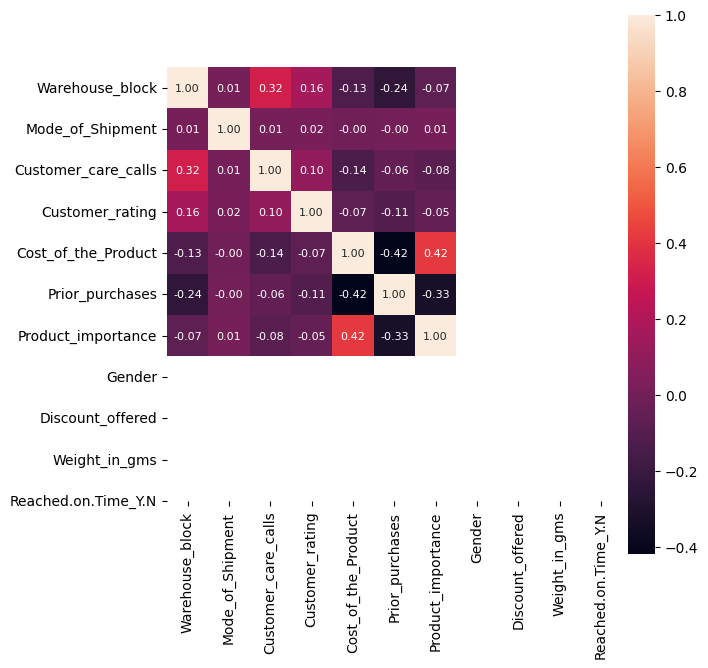

In [5]:
# Hacemos un mapa de calor

corr = data.corr(method='pearson')
plt.figure(figsize=(7,7))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
           xticklabels= data.columns, 
           yticklabels= data.columns,
           )

plt.show()

La matriz de calor nos muestra algunas correlacions que podriamos tomar como relevantes para continuar con el analisis explotario de datos. La mayoria de variables no estan correlacionadas, pero podemos rescatar algunas

Correlaciones Relevantes (metodo: Pearson): 
- Customer_care_calls 	<--0.32-->	Warehouse_block
- Customer_care_calls 	<--0.10--> 	Customer_rating
- Curtomer_Rating 	    <--0.16--> 	Warehouse_block
- Producto_importance	<--0.42-->	Cost_of_the_Products

Ahora haremos uso de un grafico scatter 3D para visualizar la interaccion de las variables que no fueron tomadas en el pariplot con el resto de variables. Estas variables son:

- Warehouse_block: Almacén de distribución de donde salió la orden (A a F).           
- Mode_of_Shipment: Medio de transporte (Flight, Road, Ship).                         
- Product_importance: Nivel de importancia del producto (low, medium, high).          
- Gender: Género del comprador (F,M).                    

Graficaremos estas variables con algunas de las correlaciones que consideramos relevantes anteriormente, ademas del analisis realizado de la grafica pairplot

NOTA: ESTOS GRAFICOS SON INTERACTIVOS, ASI QUE DE ACUERDO A LA PERSPECTIVA DE VISTA SE PODRA APRECIAR LOS PATRONES


In [79]:
# 1 (Warehous_block, Customer_rating, Discount_offered)
fig = px.scatter_3d(data, x=data.Warehouse_block, y=data.Customer_rating, z=data.Discount_offered,
                    color='Reached.on.Time_Y.N', size_max=3)
fig.show()

In [80]:
# 2 (Warehous_block, Cost_of_the_Product, Discount_offered)
fig = px.scatter_3d(data, x=data.Warehouse_block, y=data.Cost_of_the_Product, z=data.Discount_offered,
                    color='Reached.on.Time_Y.N', size_max=3)
fig.show()

In [81]:
# 3 (Warehous_block, Discount_offered, Weigth_gms)
fig = px.scatter_3d(data, x=data.Warehouse_block, y=data.Weight_in_gms, z=data.Discount_offered,
                    color='Reached.on.Time_Y.N', size_max=3)
fig.show()

In [82]:

# 4 (Mode_of_Shipment, Customer_rating, Discount_offered)
fig = px.scatter_3d(data, x=data.Mode_of_Shipment, y=data.Customer_rating, z=data.Discount_offered,
                    color='Reached.on.Time_Y.N', size_max=3)
fig.show()


In [83]:

# 5 (Mode_of_Shipment, Cost_of_the_Product, Discount_offered)
fig = px.scatter_3d(data, x=data.Mode_of_Shipment, y=data.Cost_of_the_Product, z=data.Discount_offered,
                    color='Reached.on.Time_Y.N', size_max=3)
fig.show()


In [84]:

# 6 (Mode_of_Shipment, Discount_offered, Weigth_gms)
fig = px.scatter_3d(data, x=data.Mode_of_Shipment, y=data.Weight_in_gms, z=data.Discount_offered,
                    color='Reached.on.Time_Y.N', size_max=3)
fig.show()


In [85]:


# 7 (Product_importance, Cost_of_the_Product, Discount_offered)
fig = px.scatter_3d(data, x=data.Product_importance, y=data.Cost_of_the_Product, z=data.Discount_offered,
                    color='Reached.on.Time_Y.N', size_max=3)
fig.show()


In [86]:

# 8 (Product_importance, Discount_offered, Weigth_gms)
fig = px.scatter_3d(data, x=data.Product_importance, y=data.Weight_in_gms, z=data.Discount_offered,
                    color='Reached.on.Time_Y.N', size_max=3)
fig.show()

Al visualizar las graficas anteriores podemos notar que la agregacion de una variable de tipo discreta, los datos solo se agrupan de acuerdo a la variable mas no se genera una distorsion o un cambio de patron en el agrupamiento de datos. En el modelo ML se podrian usar algunas de estas relaciones de 3 variables.

A continuacion se muetra una interaccion un tanto interesante de la graficacion 3D de tres variables continuas, en esta grafica a pesar de existir un mezcla entre identificaciones para paquetes entregados y no entregados, tambien se puede visualizar una proporcion que no muestra ningun tipo de mezcla y pertenece solo a identificadores para paquetes que fueron entregados. La interaccion de estas tres variables juntas se tomaran en cuenta para el diseño del modelo predictor.

In [92]:
# Weigth <---> Discount <---> Cost_Product
fig = px.scatter_3d(data, x=data.Weight_in_gms, y=data.Discount_offered, z=data.Cost_of_the_Product,
                    color='Reached.on.Time_Y.N', size_max=3)

fig.show()

En esta ultima grafica, a pesar de que se puede interpretar a la variable 'Prior_purchases' como una variable discreta, vemos que su interacion con las otras variables muestra agrupamientos que podrian ser utilies si se quiere desarrollar un modelo ML, ya que distingue grupos para la variable objetivo. Estas interacciones de variables se tomaran en cuenta

In [93]:
# Weigth <---> Customer_care_Calls <---> Cost_Productos
fig = px.scatter_3d(data, x=data.Prior_purchases, z=data.Discount_offered, y=data.Cost_of_the_Product,
                    color='Reached.on.Time_Y.N', size_max=3)

fig.show()

NOTA: No se tomo en cuenta la variable de genero, ya que ademas de no aportar informacion relevante al analisis, cabia la posibilidad de que se tomara como una medida discrimiatoria por el hecho de distinguir generos, ademas de que no se relaciona con el contexto del problema a resolver (solo con intensiones de hacerlo algo realista).